# ATMS 305: More working with `matplotlib` and `basemap`

Since `basemap` is part of `matplotlib`, we can use the mapping capabilities of `basemap` along with the plotting capabilities of `matplotlib` for ultimate in geo-geekiness.  This capability is very useful for visualizing geoscience data.



In [2]:
%matplotlib inline
import xarray as xr

Now, let's open a file with xarray, and get the variables available.  You can change the time and the run as you wish in the URL.  These files are hosted at NOAA/NWS/NCEP, and updated in real time.

In [4]:
data=xr.open_dataset("http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00/gfs20170329/gfs_1p00_00z")
data['capesfc']

<xarray.DataArray 'capesfc' (time: 33, lat: 181, lon: 360)>
[2150280 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2017-03-29 2017-03-29T12:00:00 2017-03-30 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    long_name: ** surface convective available potential energy [j/kg] 

Conveniently store the coordinate variables:

In [7]:
time_1d = data.time
lat_1d = data.lat
lon_1d = data.lon
pres_1d = data.lev
time_1d = data['time']

In [8]:
time_1d

<xarray.DataArray 'time' (time: 33)>
array(['2017-03-29T00:00:00.000000000', '2017-03-29T12:00:00.000000000',
       '2017-03-30T00:00:00.000000000', '2017-03-30T12:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-03-31T12:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-04-01T12:00:00.000000000',
       '2017-04-02T00:00:00.000000000', '2017-04-02T12:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2017-04-03T12:00:00.000000000',
       '2017-04-04T00:00:00.000000000', '2017-04-04T12:00:00.000000000',
       '2017-04-05T00:00:00.000000000', '2017-04-05T12:00:00.000000000',
       '2017-04-06T00:00:00.000000000', '2017-04-06T12:00:00.000000000',
       '2017-04-07T00:00:00.000000000', '2017-04-07T12:00:00.000000000',
       '2017-04-08T00:00:00.000000000', '2017-04-08T12:00:00.000000000',
       '2017-04-09T00:00:00.000000000', '2017-04-09T12:00:00.000000000',
       '2017-04-10T00:00:00.000000000', '2017-04-10T12:00:00.000000000',
       '2017-0

Let's grab temperature on isobaric surfaces (temperature at a constant pressure value in the atmosphere).  What are the dimensions?

In [9]:
temperature=data['tmpprs']
temperature = data.tmpprs
temperature

<xarray.DataArray 'tmpprs' (time: 33, lev: 31, lat: 181, lon: 360)>
[66658680 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2017-03-29 2017-03-29T12:00:00 2017-03-30 ...
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 850.0 800.0 750.0 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    long_name: ** (1000 975 950 925 900.. 7 5 3 2 1) temperature [k] 

Let's grab the map at the initial time, and at 850 hPa.

In [10]:
temp_850=temperature.sel(time=time_1d[0],lev=850.,method='nearest')
temp_850

<xarray.DataArray 'tmpprs' (lat: 181, lon: 360)>
array([[ 235.300003,  235.300003,  235.300003, ...,  235.300003,  235.300003,
         235.300003],
       [ 234.5     ,  234.400009,  234.400009, ...,  234.600006,  234.600006,
         234.5     ],
       [ 235.100006,  235.100006,  235.199997, ...,  235.100006,  235.100006,
         235.100006],
       ..., 
       [ 248.600006,  248.600006,  248.600006, ...,  248.600006,  248.600006,
         248.600006],
       [ 250.100006,  250.100006,  250.      , ...,  250.100006,  250.100006,
         250.100006],
       [ 251.800003,  251.800003,  251.800003, ...,  251.800003,  251.800003,
         251.800003]])
Coordinates:
    time     datetime64[ns] 2017-03-29
    lev      float64 850.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    long_name: ** (1000 975 950 925 900.. 7 5 3 2 1) temperature [k] 

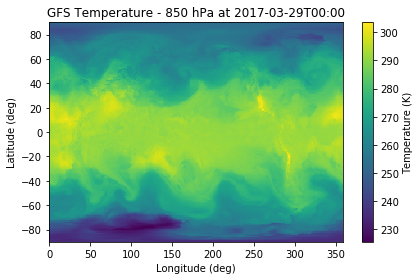

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

plt.pcolormesh(lon_1d,lat_1d,temp_850)

plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')

title = 'GFS Temperature - 850 hPa at {0}'.format(str(time_1d.values[0])[:-13]) # remove the useless 0s
plt.title(title)

cb = plt.colorbar()
cb.set_label('Temperature (K)')
plt.tight_layout()

Now let's use Basemap to generate a contour map over the US!

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3488: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3497: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


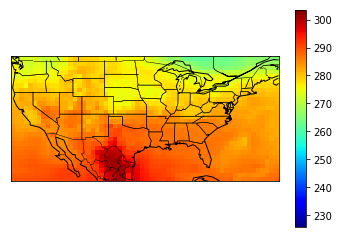

In [23]:
# Step 1: import Basemap
from mpl_toolkits.basemap import Basemap


# Step 2: define map
map_fig = Basemap(llcrnrlat=22.,llcrnrlon=360-125.,urcrnrlat=50.,urcrnrlon=360.-65.)


# Step 2.5: data prep
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)


# Step 3: plot the map
map_fig.pcolormesh(lon_1d,lat_1d,temp_850,cmap='jet')


#Step 4: make it pretty
map_fig.drawcoastlines()
map_fig.drawstates()
map_fig.drawcountries()
plt.colorbar()

plt.show()

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3580: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3617: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3647: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


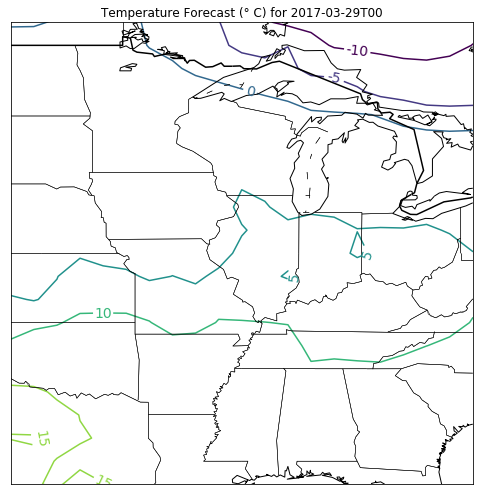

In [24]:
from mpl_toolkits.basemap import Basemap


fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map_fig = Basemap(llcrnrlon=260.,llcrnrlat=30.,urcrnrlon=280.,urcrnrlat=50.,
             resolution='l', projection='cyl')

# #need to mesh the latitudes and longitudes

lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)


#store the plotting object into CS, and then add contour labels
#also convert to degrees C
CS=map_fig.contour(lon_2d, lat_2d, temp_850-273.15)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map_fig.drawcoastlines()

map_fig.drawstates()

map_fig.drawcountries(linewidth=1.5)

# Make a title with the time value
# plt.title('Temperature forecast ' + '(' + u'\u00b0' + 'C)' + ' for '  + str(time_1d.values[0])[0:13] + 'UTC', fontsize=20)
plt.title('Temperature Forecast ({0} C) for {1}'.format(u'\u00b0', str(time_1d.values[0])[0:13]))
plt.show()

Let's do a filled contour instead!

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


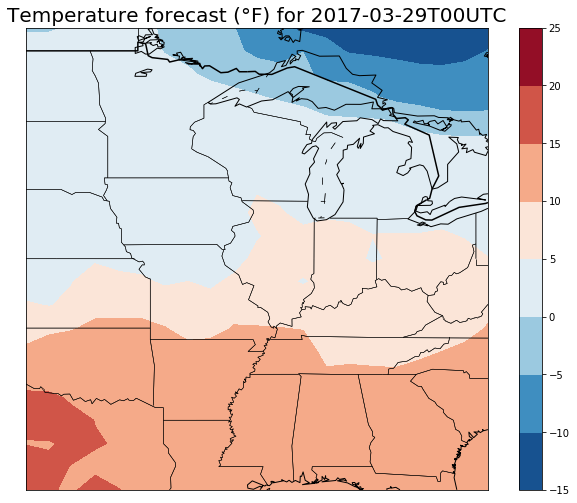

In [30]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map_fig = Basemap(llcrnrlon=260.,llcrnrlat=30.,urcrnrlon=280.,urcrnrlat=50.,
             resolution='l', projection='cyl')

#use contourf to fill the contours
CS=map_fig.contourf(lon_2d, lat_2d, temp_850-273.15,cmap='RdBu_r')

map_fig.drawcoastlines()

map_fig.drawstates()

map_fig.drawcountries(linewidth=1.5)

plt.colorbar()

# Make a title with the time value
plt.title('Temperature forecast ' + '(' + u'\u00b0' + 'F)' + ' for '  + str(time_1d.values[0])[0:13] + 'UTC', fontsize=20)

plt.show()

Let's change the contour interval and the colormap!

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


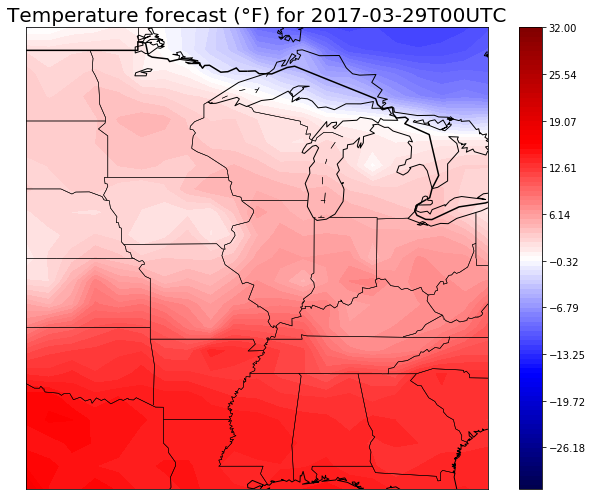

In [26]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(llcrnrlon=260.,llcrnrlat=30.,urcrnrlon=280.,urcrnrlat=50.,
             resolution='l', projection='cyl')

#specify levels, and change the colortable
#see here for more color tables http://matplotlib.org/examples/color/colormaps_reference.html
#add _r to reverse color table
levels=np.linspace(-32,32,100)
map.contourf(lon_2d, lat_2d, temp_850-273.15,levels,cmap='seismic')

map.drawcoastlines()

map.drawstates()

map.drawcountries(linewidth=1.5)

plt.colorbar()

# Make a title with the time value
plt.title('Temperature forecast ' + '(' + u'\u00b0' + 'F)' + ' for '  + str(time_1d.values[0])[0:13] + 'UTC', fontsize=20)

plt.show()

Lines and contours.  Why not?

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3488: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3497: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3580: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3617: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3647: MatplotlibDeprecationWarning: axes.hold is deprecated.
    S

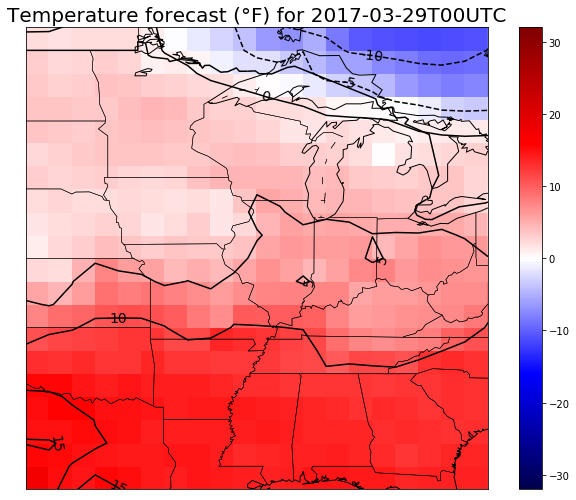

In [27]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(llcrnrlon=260.,llcrnrlat=30.,urcrnrlon=280.,urcrnrlat=50.,
             resolution='l', projection='cyl')

#use pcolormesh to plot a blocky representation where data is defined, 
#note the change in how to specify values
PM=map.pcolormesh(lon_2d, lat_2d, temp_850-273.15,cmap='seismic',vmin=-32,vmax=32)
CS=map.contour(lon_2d, lat_2d, temp_850-273.15,colors='k')
plt.clabel(CS,inline=0, fontsize=14, fmt='%1.0f')

map.drawcoastlines()

map.drawstates()

map.drawcountries(linewidth=1.5)

plt.colorbar(PM)

# Make a title with the time value
plt.title('Temperature forecast ' + '(' + u'\u00b0' + 'F)' + ' for '  + str(time_1d.values[0])[0:13] + 'UTC', fontsize=20)

plt.show()

## Cross-sections

We can also draw vertical cross sections using the vertical coordinate as the y-axis and latitude and longitude as the x-axis.

In [29]:
time_1d = data.time
lat_1d = data.lat
lon_1d = data.lon
lev_1d = data.lev
#Get the temperature in degrees Kelvin
temp_xsect=data['tmpprs'].sel(time=time_1d[0],lon=-88+360,method='nearest')
#Get the east-west wind in m/s
uwnd_xsect=data['ugrdprs'].sel(time=time_1d[0],lon=-88+360,method='nearest')
temp_xsect

<xarray.DataArray 'tmpprs' (lev: 31, lat: 181)>
array([[ 242.699997,  243.900009,  247.600006, ...,  245.699997,  245.199997,
         244.800003],
       [ 241.5     ,  242.699997,  246.5     , ...,  244.400009,  244.199997,
         243.800003],
       [ 240.300003,  241.5     ,  245.199997, ...,  246.900009,  246.900009,
         246.800003],
       ..., 
       [ 224.699997,  224.5     ,  224.300003, ...,  237.5     ,  238.600006,
         239.800003],
       [ 230.600006,  230.400009,  230.199997, ...,  245.100006,  246.199997,
         247.400009],
       [ 244.699997,  244.300003,  244.      , ...,  254.400009,  255.199997,
         256.100006]])
Coordinates:
    time     datetime64[ns] 2017-03-29
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 850.0 800.0 750.0 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
    lon      float64 272.0
Attributes:
    long_name: ** (1000 975 950 925 900.. 7 5 3 2 1) temperature [k] 

Here, we don't need a map.  We can just use matplotlib.  Lets contourf the temperature and contour the u-wind.  Meteorologists - see the thermal wind in action!

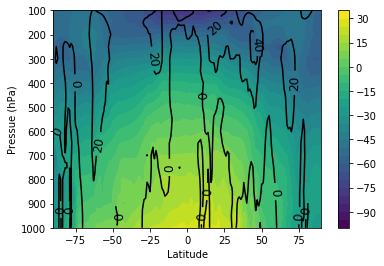

In [32]:
fig,ax = plt.subplots(1,1)

# color map
levels=np.arange(-100,40,5)
CS=ax.contourf(lat_1d,lev_1d,temp_xsect-273.15,levels)
ax.set_ylim([1000,100])
plt.colorbar(CS)

# lines on the map
levels2=np.arange(-200,200,20)
CS2=ax.contour(lat_1d,lev_1d,uwnd_xsect,levels2,colors='k')
ax.clabel(CS2,inline=1, fontsize=12, fmt='%1.0f')

plt.xlabel('Latitude')
plt.ylabel('Pressue (hPa)')
plt.show()

# Time-height cross sections

Here, we want values at a specific point over time.

In [33]:
time_1d = data.time.values
lat_1d = data.lat
lon_1d = data.lon
lev_1d = data.lev
#Get the relative humidity in %
rh_xsect=data['rhprs'].sel(lat=40.,lon=-88+360,method='nearest')
#Get the absolute vorticity in s**-1
absvprs_xsect=data['absvprs'].sel(lat=40.,lon=-88+360,method='nearest')

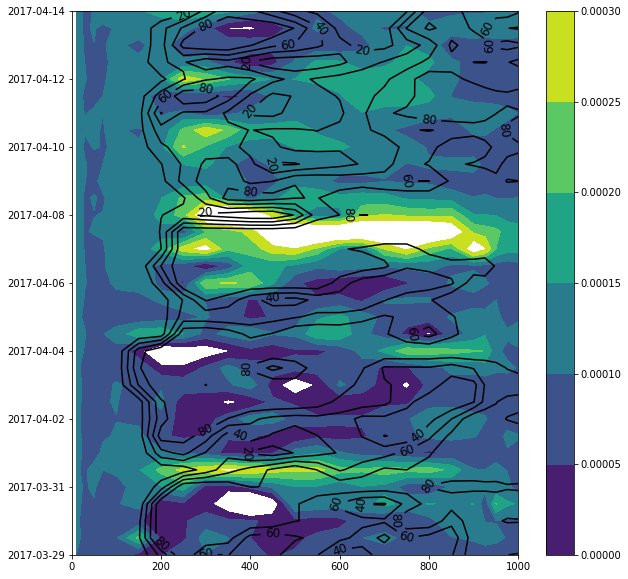

In [34]:
fig,ax = plt.subplots(1,1, figsize=(10, 10))

levels=np.arange(0,35e-5,5e-5)
CS=ax.contourf(lev_1d,time_1d,absvprs_xsect,levels)
plt.colorbar(CS)
levels2=np.arange(0,110,20)
CS2=ax.contour(lev_1d,time_1d,rh_xsect,levels2,colors='k')
ax.clabel(CS2,inline=1, fontsize=12, fmt='%1.0f')
plt.show()

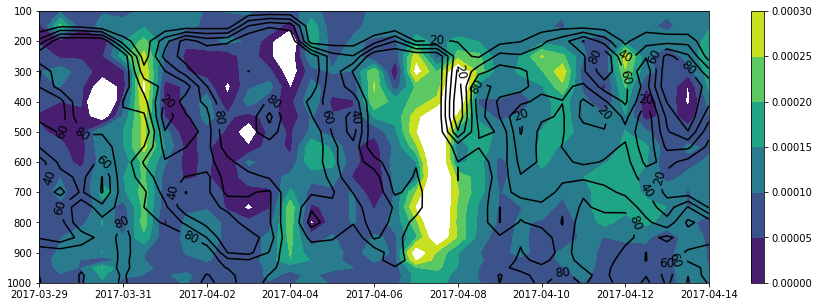

In [35]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([15,5])
levels=np.arange(0,35e-5,5e-5)
CS=ax.contourf(time_1d,lev_1d,np.transpose(absvprs_xsect.values),levels)
ax.set_ylim([1000,100])
plt.colorbar(CS)
levels2=np.arange(0,110,20)
CS2=ax.contour(time_1d,lev_1d,np.transpose(rh_xsect.values),levels2,colors='k')
ax.clabel(CS2,inline=1, fontsize=12, fmt='%1.0f')
plt.show()

In [ ]:
plt.contour() #shift+tab gives you information on the command